In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from warnings import filterwarnings
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Supervised-Learning/main/wisc_bc_data.csv")

In [3]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 100

In [4]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,0.2360,0.6656,1.670,17.43,0.008045,0.011800,0.01683,0.012410,0.01924,0.002248,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,0.4505,1.1970,3.430,27.10,0.007470,0.035810,0.03354,0.013650,0.03504,0.003318,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,0.1967,1.3870,1.342,13.54,0.005158,0.009355,0.01056,0.007483,0.01718,0.002198,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,0.3384,1.3430,1.851,26.33,0.011270,0.034980,0.02187,0.019650,0.01580,0.003442,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,0.1783,0.4125,1.338,17.72,0.005012,0.014850,0.01551,0.009155,0.01647,0.001767,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
5,906539,B,11.57,19.04,74.20,409.7,0.08546,0.07722,0.05485,0.01428,0.2031,0.06267,0.2864,1.4400,2.206,20.30,0.007278,0.020470,0.04447,0.008799,0.01868,0.003339,13.07,26.98,86.43,520.5,0.1249,0.1937,0.25600,0.06664,0.3035,0.08284
6,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,0.2388,2.9040,1.936,16.97,0.008200,0.029820,0.05738,0.012670,0.01488,0.004738,12.48,37.16,82.28,474.2,0.1298,0.2517,0.36300,0.09653,0.2112,0.08732
7,87880,M,13.81,23.75,91.56,597.8,0.13230,0.17680,0.15580,0.09176,0.2251,0.07421,0.5648,1.9300,3.909,52.72,0.008824,0.031080,0.03112,0.012910,0.01998,0.004506,19.20,41.85,128.50,1153.0,0.2226,0.5209,0.46460,0.20130,0.4432,0.10860
8,862989,B,10.49,19.29,67.41,336.1,0.09989,0.08578,0.02995,0.01201,0.2217,0.06481,0.3550,1.5340,2.302,23.13,0.007595,0.022190,0.02880,0.008614,0.02710,0.003451,11.54,23.31,74.22,402.8,0.1219,0.1486,0.07987,0.03203,0.2826,0.07552
9,89827,B,11.06,14.96,71.49,373.9,0.10330,0.09097,0.05397,0.03341,0.1776,0.06907,0.1601,0.8225,1.355,10.80,0.007416,0.018770,0.02758,0.010100,0.02348,0.002917,11.92,19.90,79.76,440.0,0.1418,0.2210,0.22990,0.10750,0.3301,0.09080


In [5]:
df.shape

(569, 32)

In [6]:
df.dtypes

id                     int64
diagnosis             object
radius_mean          float64
texture_mean         float64
perimeter_mean       float64
area_mean            float64
smoothness_mean      float64
compactness_mean     float64
concavity_mean       float64
points_mean          float64
symmetry_mean        float64
dimension_mean       float64
radius_se            float64
texture_se           float64
perimeter_se         float64
area_se              float64
smoothness_se        float64
compactness_se       float64
concavity_se         float64
points_se            float64
symmetry_se          float64
dimension_se         float64
radius_worst         float64
texture_worst        float64
perimeter_worst      float64
area_worst           float64
smoothness_worst     float64
compactness_worst    float64
concavity_worst      float64
points_worst         float64
symmetry_worst       float64
dimension_worst      float64
dtype: object

In [7]:
df.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   diagnosis          569 non-null    object 
 2   radius_mean        569 non-null    float64
 3   texture_mean       569 non-null    float64
 4   perimeter_mean     569 non-null    float64
 5   area_mean          569 non-null    float64
 6   smoothness_mean    569 non-null    float64
 7   compactness_mean   569 non-null    float64
 8   concavity_mean     569 non-null    float64
 9   points_mean        569 non-null    float64
 10  symmetry_mean      569 non-null    float64
 11  dimension_mean     569 non-null    float64
 12  radius_se          569 non-null    float64
 13  texture_se         569 non-null    float64
 14  perimeter_se       569 non-null    float64
 15  area_se            569 non-null    float64
 16  smoothness_se      569 non

<AxesSubplot:>

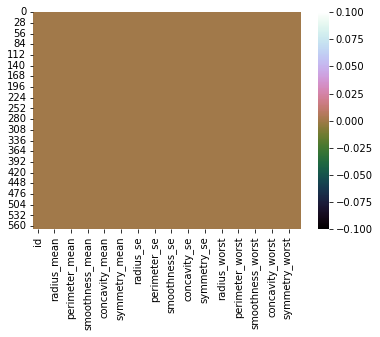

In [9]:
sns.heatmap(df.isnull(), cmap='cubehelix')

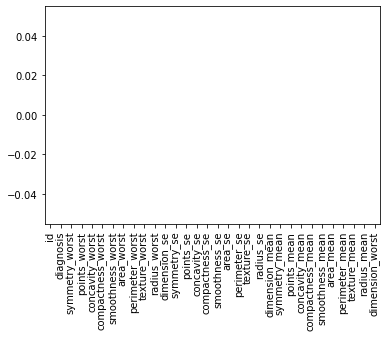

In [10]:
# Missing Percentage
miss_percent=((df.isna().sum()/len(df))*100).sort_values(ascending=False)
miss_percent.plot.bar()
plt.show()

### converting objects into intergers

In [11]:
dummies=pd.get_dummies(df[['diagnosis']])
df=pd.concat([df,dummies],axis=1)

In [12]:
columns=['diagnosis']
df.drop(columns,axis=1,inplace=True)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 569 non-null    int64  
 1   radius_mean        569 non-null    float64
 2   texture_mean       569 non-null    float64
 3   perimeter_mean     569 non-null    float64
 4   area_mean          569 non-null    float64
 5   smoothness_mean    569 non-null    float64
 6   compactness_mean   569 non-null    float64
 7   concavity_mean     569 non-null    float64
 8   points_mean        569 non-null    float64
 9   symmetry_mean      569 non-null    float64
 10  dimension_mean     569 non-null    float64
 11  radius_se          569 non-null    float64
 12  texture_se         569 non-null    float64
 13  perimeter_se       569 non-null    float64
 14  area_se            569 non-null    float64
 15  smoothness_se      569 non-null    float64
 16  compactness_se     569 non

In [14]:
pd.set_option('display.max_columns',100)
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst,diagnosis_B,diagnosis_M
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417,0.372583
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918,0.483918
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000,0.000000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000,0.000000
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000,0.000000
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000,1.000000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000,1.000000


In [15]:
df.head(50)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst,diagnosis_B,diagnosis_M
0,87139402,12.320,12.39,78.85,464.1,0.10280,0.06981,0.039870,0.037000,0.1959,0.05955,0.2360,0.6656,1.6700,17.430,0.008045,0.011800,0.016830,0.012410,0.01924,0.002248,13.50,15.64,86.97,549.1,0.13850,0.12660,0.124200,0.09391,0.2827,0.06771,1,0
1,8910251,10.600,18.95,69.28,346.4,0.09688,0.11470,0.063870,0.026420,0.1922,0.06491,0.4505,1.1970,3.4300,27.100,0.007470,0.035810,0.033540,0.013650,0.03504,0.003318,11.88,22.94,78.28,424.8,0.12130,0.25150,0.191600,0.07926,0.2940,0.07587,1,0
2,905520,11.040,16.83,70.92,373.2,0.10770,0.07804,0.030460,0.024800,0.1714,0.06340,0.1967,1.3870,1.3420,13.540,0.005158,0.009355,0.010560,0.007483,0.01718,0.002198,12.41,26.44,79.93,471.4,0.13690,0.14820,0.106700,0.07431,0.2998,0.07881,1,0
3,868871,11.280,13.39,73.00,384.8,0.11640,0.11360,0.046350,0.047960,0.1771,0.06072,0.3384,1.3430,1.8510,26.330,0.011270,0.034980,0.021870,0.019650,0.01580,0.003442,11.92,15.77,76.53,434.0,0.13670,0.18220,0.086690,0.08611,0.2102,0.06784,1,0
4,9012568,15.190,13.21,97.65,711.8,0.07963,0.06934,0.033930,0.026570,0.1721,0.05544,0.1783,0.4125,1.3380,17.720,0.005012,0.014850,0.015510,0.009155,0.01647,0.001767,16.20,15.73,104.50,819.1,0.11260,0.17370,0.136200,0.08178,0.2487,0.06766,1,0
5,906539,11.570,19.04,74.20,409.7,0.08546,0.07722,0.054850,0.014280,0.2031,0.06267,0.2864,1.4400,2.2060,20.300,0.007278,0.020470,0.044470,0.008799,0.01868,0.003339,13.07,26.98,86.43,520.5,0.12490,0.19370,0.256000,0.06664,0.3035,0.08284,1,0
6,925291,11.510,23.93,74.52,403.5,0.09261,0.10210,0.111200,0.041050,0.1388,0.06570,0.2388,2.9040,1.9360,16.970,0.008200,0.029820,0.057380,0.012670,0.01488,0.004738,12.48,37.16,82.28,474.2,0.12980,0.25170,0.363000,0.09653,0.2112,0.08732,1,0
7,87880,13.810,23.75,91.56,597.8,0.13230,0.17680,0.155800,0.091760,0.2251,0.07421,0.5648,1.9300,3.9090,52.720,0.008824,0.031080,0.031120,0.012910,0.01998,0.004506,19.20,41.85,128.50,1153.0,0.22260,0.52090,0.464600,0.20130,0.4432,0.10860,0,1
8,862989,10.490,19.29,67.41,336.1,0.09989,0.08578,0.029950,0.012010,0.2217,0.06481,0.3550,1.5340,2.3020,23.130,0.007595,0.022190,0.028800,0.008614,0.02710,0.003451,11.54,23.31,74.22,402.8,0.12190,0.14860,0.079870,0.03203,0.2826,0.07552,1,0
9,89827,11.060,14.96,71.49,373.9,0.10330,0.09097,0.053970,0.033410,0.1776,0.06907,0.1601,0.8225,1.3550,10.800,0.007416,0.018770,0.027580,0.010100,0.02348,0.002917,11.92,19.90,79.76,440.0,0.14180,0.22100,0.229900,0.10750,0.3301,0.09080,1,0


### Removing the outliers

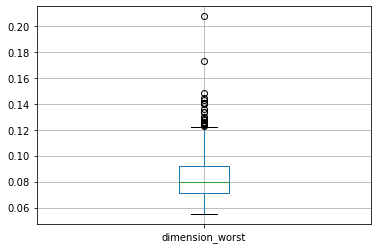

In [16]:
df.boxplot(column=["dimension_worst"])
plt.show()

In [17]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [18]:
lowdiagnosis,uppdiagnosis=remove_outlier(df['radius_mean'])
df["radius_mean"]=np.where(df['radius_mean']>uppdiagnosis,uppdiagnosis,df['radius_mean'])
df["radius_mean"]=np.where(df['radius_mean']<lowdiagnosis,lowdiagnosis,df['radius_mean'])

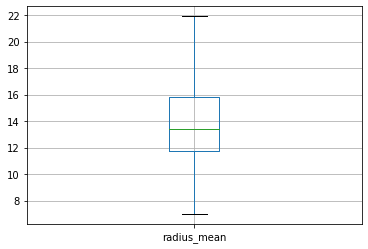

In [19]:
df.boxplot(column=["radius_mean"])
plt.show()

In [20]:
lowdiagnosis,uppdiagnosis=remove_outlier(df['texture_mean'])
df["texture_mean"]=np.where(df['texture_mean']>uppdiagnosis,uppdiagnosis,df['texture_mean'])
df["texture_mean"]=np.where(df['texture_mean']<lowdiagnosis,lowdiagnosis,df['texture_mean'])

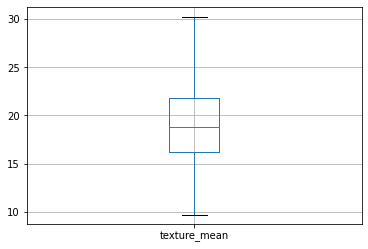

In [21]:
df.boxplot(column=["texture_mean"])
plt.show()

In [22]:
lowdiagnosis,uppdiagnosis=remove_outlier(df['perimeter_mean'])
df["perimeter_mean"]=np.where(df['perimeter_mean']>uppdiagnosis,uppdiagnosis,df['perimeter_mean'])
df["perimeter_mean"]=np.where(df['perimeter_mean']<lowdiagnosis,lowdiagnosis,df['perimeter_mean'])

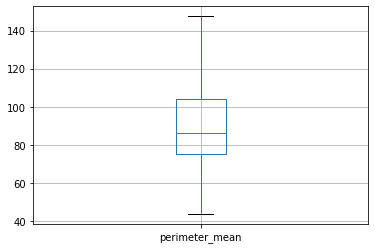

In [23]:
df.boxplot(column=["perimeter_mean"])
plt.show()

In [24]:
lowdiagnosis,uppdiagnosis=remove_outlier(df['area_mean'])
df["area_mean"]=np.where(df['area_mean']>uppdiagnosis,uppdiagnosis,df['area_mean'])
df["area_mean"]=np.where(df['area_mean']<lowdiagnosis,lowdiagnosis,df['area_mean'])

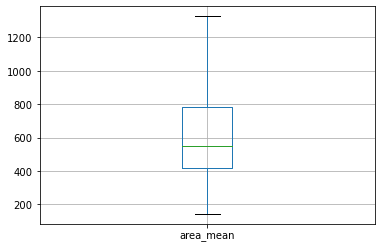

In [25]:
df.boxplot(column=["area_mean"])
plt.show()

In [26]:
lowdiagnosis,uppdiagnosis=remove_outlier(df['smoothness_mean'])
df["smoothness_mean"]=np.where(df['smoothness_mean']>uppdiagnosis,uppdiagnosis,df['smoothness_mean'])
df["smoothness_mean"]=np.where(df['smoothness_mean']<lowdiagnosis,lowdiagnosis,df['smoothness_mean'])

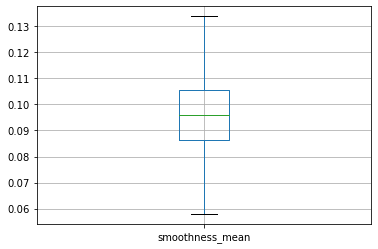

In [27]:
df.boxplot(column=["smoothness_mean"])
plt.show()

In [28]:
lowdiagnosis,uppdiagnosis=remove_outlier(df['compactness_mean'])
df["compactness_mean"]=np.where(df['compactness_mean']>uppdiagnosis,uppdiagnosis,df['compactness_mean'])
df["compactness_mean"]=np.where(df['compactness_mean']<lowdiagnosis,lowdiagnosis,df['compactness_mean'])

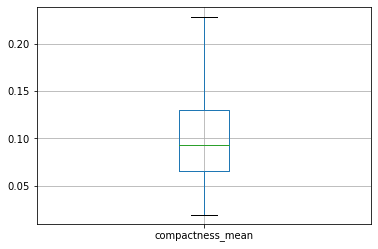

In [29]:
df.boxplot(column=["compactness_mean"])
plt.show()

In [30]:
lowdiagnosis,uppdiagnosis=remove_outlier(df['concavity_mean'])
df["concavity_mean"]=np.where(df['concavity_mean']>uppdiagnosis,uppdiagnosis,df['concavity_mean'])
df["concavity_mean"]=np.where(df['concavity_mean']<lowdiagnosis,lowdiagnosis,df['concavity_mean'])

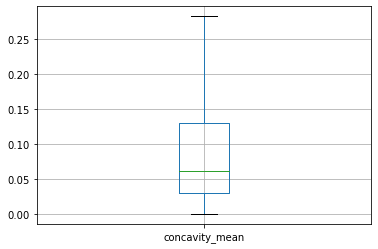

In [31]:
df.boxplot(column=["concavity_mean"])
plt.show()

In [32]:
lowdiagnosis,uppdiagnosis=remove_outlier(df['points_mean'])
df["points_mean"]=np.where(df['points_mean']>uppdiagnosis,uppdiagnosis,df['points_mean'])
df["points_mean"]=np.where(df['points_mean']<lowdiagnosis,lowdiagnosis,df['points_mean'])

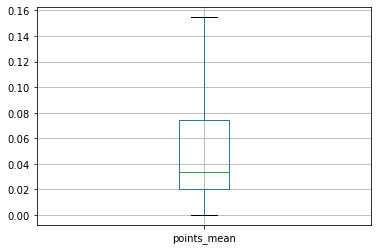

In [33]:
df.boxplot(column=["points_mean"])
plt.show()

In [34]:
lowdiagnosis,uppdiagnosis=remove_outlier(df['symmetry_mean'])
df["symmetry_mean"]=np.where(df['symmetry_mean']>uppdiagnosis,uppdiagnosis,df['symmetry_mean'])
df["symmetry_mean"]=np.where(df['symmetry_mean']<lowdiagnosis,lowdiagnosis,df['symmetry_mean'])

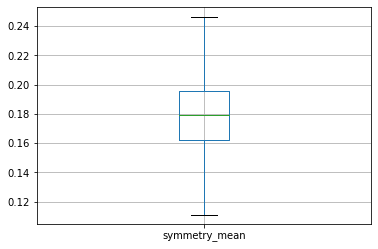

In [35]:
df.boxplot(column=["symmetry_mean"])
plt.show()

In [36]:
lowdiagnosis,uppdiagnosis=remove_outlier(df['dimension_mean'])
df["dimension_mean"]=np.where(df['dimension_mean']>uppdiagnosis,uppdiagnosis,df['dimension_mean'])
df["dimension_mean"]=np.where(df['dimension_mean']<lowdiagnosis,lowdiagnosis,df['dimension_mean'])

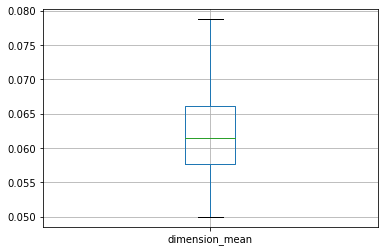

In [37]:
df.boxplot(column=["dimension_mean"])
plt.show()

In [38]:
lowdiagnosis,uppdiagnosis=remove_outlier(df['radius_se'])
df["radius_se"]=np.where(df['radius_se']>uppdiagnosis,uppdiagnosis,df['radius_se'])
df["radius_se"]=np.where(df['radius_se']<lowdiagnosis,lowdiagnosis,df['radius_se'])

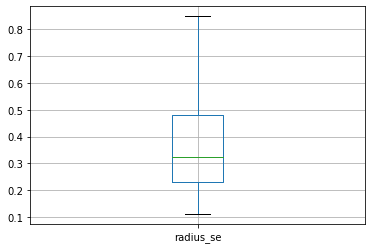

In [39]:
df.boxplot(column=["radius_se"])
plt.show()

In [40]:
lowdiagnosis,uppdiagnosis=remove_outlier(df['texture_se'])
df["texture_se"]=np.where(df['texture_se']>uppdiagnosis,uppdiagnosis,df['texture_se'])
df["texture_se"]=np.where(df['texture_se']<lowdiagnosis,lowdiagnosis,df['texture_se'])

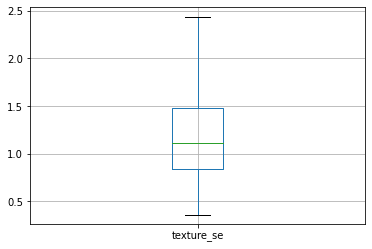

In [41]:
df.boxplot(column=["texture_se"])
plt.show()

In [42]:
lowdiagnosis,uppdiagnosis=remove_outlier(df['perimeter_se'])
df["perimeter_se"]=np.where(df['perimeter_se']>uppdiagnosis,uppdiagnosis,df['perimeter_se'])
df["perimeter_se"]=np.where(df['perimeter_se']<lowdiagnosis,lowdiagnosis,df['perimeter_se'])

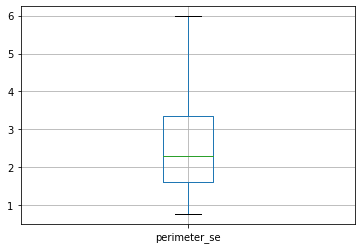

In [43]:
df.boxplot(column=["perimeter_se"])
plt.show()

In [44]:
lowdiagnosis,uppdiagnosis=remove_outlier(df['area_se'])
df["area_se"]=np.where(df['area_se']>uppdiagnosis,uppdiagnosis,df['area_se'])
df["area_se"]=np.where(df['area_se']<lowdiagnosis,lowdiagnosis,df['area_se'])

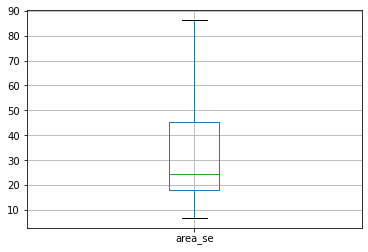

In [45]:
df.boxplot(column=["area_se"])
plt.show()

In [46]:
lowdiagnosis,uppdiagnosis=remove_outlier(df['smoothness_se'])
df["smoothness_se"]=np.where(df['smoothness_se']>uppdiagnosis,uppdiagnosis,df['smoothness_se'])
df["smoothness_se"]=np.where(df['smoothness_se']<lowdiagnosis,lowdiagnosis,df['smoothness_se'])

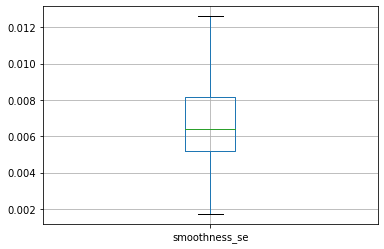

In [47]:
df.boxplot(column=["smoothness_se"])
plt.show()

In [48]:
lowdiagnosis,uppdiagnosis=remove_outlier(df['compactness_se'])
df["compactness_se"]=np.where(df['compactness_se']>uppdiagnosis,uppdiagnosis,df['compactness_se'])
df["compactness_se"]=np.where(df['compactness_se']<lowdiagnosis,lowdiagnosis,df['compactness_se'])

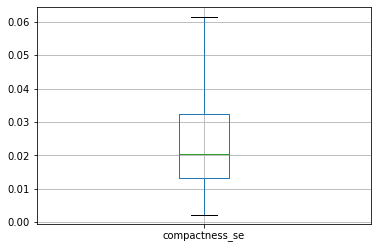

In [49]:
df.boxplot(column=["compactness_se"])
plt.show()

In [50]:
lowdiagnosis,uppdiagnosis=remove_outlier(df['concavity_se'])
df["concavity_se"]=np.where(df['concavity_se']>uppdiagnosis,uppdiagnosis,df['concavity_se'])
df["concavity_se"]=np.where(df['concavity_se']<lowdiagnosis,lowdiagnosis,df['concavity_se'])

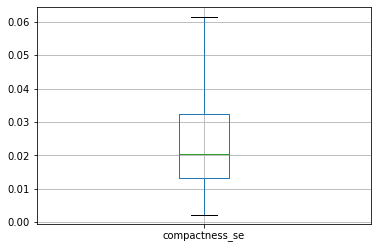

In [51]:
df.boxplot(column=["compactness_se"])
plt.show()

In [52]:
lowdiagnosis,uppdiagnosis=remove_outlier(df['points_se'])
df["points_se"]=np.where(df['points_se']>uppdiagnosis,uppdiagnosis,df['points_se'])
df["points_se"]=np.where(df['points_se']<lowdiagnosis,lowdiagnosis,df['points_se'])

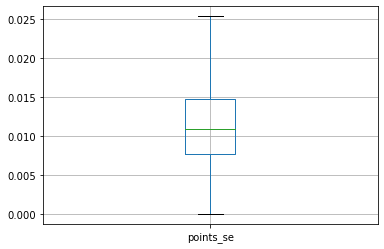

In [53]:
df.boxplot(column=["points_se"])
plt.show()

In [54]:
lowdiagnosis,uppdiagnosis=remove_outlier(df['symmetry_se'])
df["symmetry_se"]=np.where(df['symmetry_se']>uppdiagnosis,uppdiagnosis,df['symmetry_se'])
df["symmetry_se"]=np.where(df['symmetry_se']<lowdiagnosis,lowdiagnosis,df['symmetry_se'])

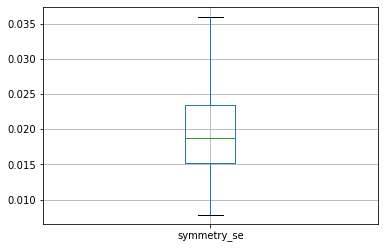

In [55]:
df.boxplot(column=["symmetry_se"])
plt.show()

In [56]:
lowdiagnosis,uppdiagnosis=remove_outlier(df['dimension_se'])
df["dimension_se"]=np.where(df['dimension_se']>uppdiagnosis,uppdiagnosis,df['dimension_se'])
df["dimension_se"]=np.where(df['dimension_se']<lowdiagnosis,lowdiagnosis,df['dimension_se'])

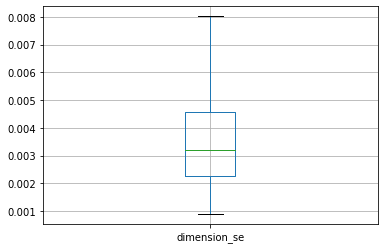

In [57]:
df.boxplot(column=["dimension_se"])
plt.show()

In [58]:
lowdiagnosis,uppdiagnosis=remove_outlier(df['radius_worst'])
df["radius_worst"]=np.where(df['radius_worst']>uppdiagnosis,uppdiagnosis,df['radius_worst'])
df["radius_worst"]=np.where(df['radius_worst']<lowdiagnosis,lowdiagnosis,df['radius_worst'])

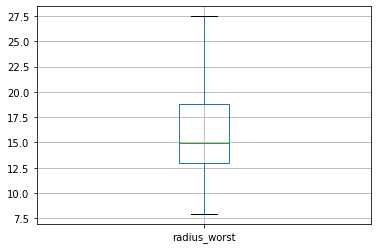

In [59]:
df.boxplot(column=["radius_worst"])
plt.show()

In [60]:
lowdiagnosis,uppdiagnosis=remove_outlier(df['texture_worst'])
df["texture_worst"]=np.where(df['texture_worst']>uppdiagnosis,uppdiagnosis,df['texture_worst'])
df["texture_worst"]=np.where(df['texture_worst']<lowdiagnosis,lowdiagnosis,df['texture_worst'])

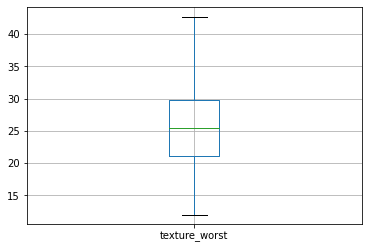

In [61]:
df.boxplot(column=["texture_worst"])
plt.show()

In [62]:
lowdiagnosis,uppdiagnosis=remove_outlier(df['perimeter_worst'])
df["perimeter_worst"]=np.where(df['perimeter_worst']>uppdiagnosis,uppdiagnosis,df['perimeter_worst'])
df["perimeter_worst"]=np.where(df['perimeter_worst']<lowdiagnosis,lowdiagnosis,df['perimeter_worst'])

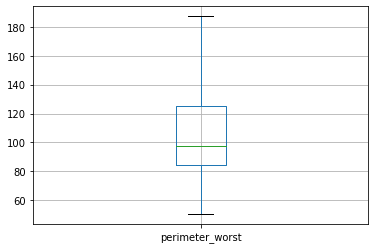

In [63]:
df.boxplot(column=["perimeter_worst"])
plt.show()

In [64]:
lowdiagnosis,uppdiagnosis=remove_outlier(df['area_worst'])
df["area_worst"]=np.where(df['area_worst']>uppdiagnosis,uppdiagnosis,df['area_worst'])
df["area_worst"]=np.where(df['area_worst']<lowdiagnosis,lowdiagnosis,df['area_worst'])

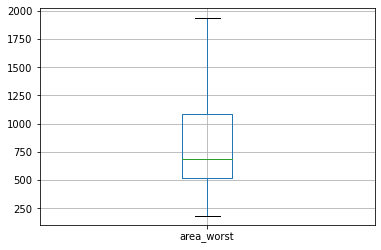

In [65]:
df.boxplot(column=["area_worst"])
plt.show()

In [66]:
lowdiagnosis,uppdiagnosis=remove_outlier(df['smoothness_worst'])
df["smoothness_worst"]=np.where(df['smoothness_worst']>uppdiagnosis,uppdiagnosis,df['smoothness_worst'])
df["smoothness_worst"]=np.where(df['smoothness_worst']<lowdiagnosis,lowdiagnosis,df['smoothness_worst'])

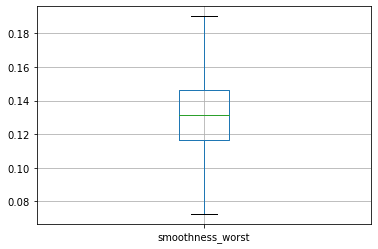

In [67]:
df.boxplot(column=["smoothness_worst"])
plt.show()

In [68]:
lowdiagnosis,uppdiagnosis=remove_outlier(df['compactness_worst'])
df["compactness_worst"]=np.where(df['compactness_worst']>uppdiagnosis,uppdiagnosis,df['compactness_worst'])
df["compactness_worst"]=np.where(df['compactness_worst']<lowdiagnosis,lowdiagnosis,df['compactness_worst'])

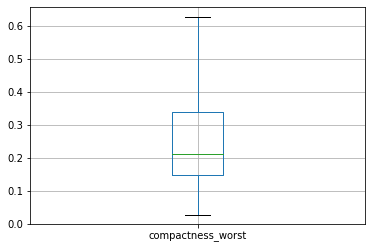

In [69]:
df.boxplot(column=["compactness_worst"])
plt.show()

In [70]:
lowdiagnosis,uppdiagnosis=remove_outlier(df['concavity_worst'])
df["concavity_worst"]=np.where(df['concavity_worst']>uppdiagnosis,uppdiagnosis,df['concavity_worst'])
df["concavity_worst"]=np.where(df['concavity_worst']<lowdiagnosis,lowdiagnosis,df['concavity_worst'])

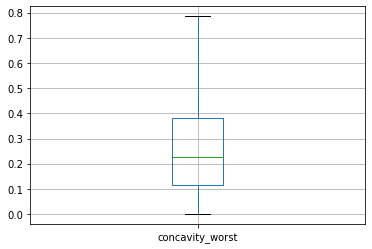

In [71]:
df.boxplot(column=["concavity_worst"])
plt.show()

In [72]:
lowdiagnosis,uppdiagnosis=remove_outlier(df['symmetry_worst'])
df["symmetry_worst"]=np.where(df['symmetry_worst']>uppdiagnosis,uppdiagnosis,df['symmetry_worst'])
df["symmetry_worst"]=np.where(df['symmetry_worst']<lowdiagnosis,lowdiagnosis,df['symmetry_worst'])

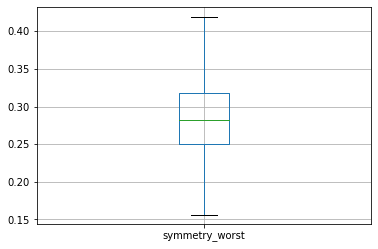

In [73]:
df.boxplot(column=["symmetry_worst"])
plt.show()

In [74]:
lowdiagnosis,uppdiagnosis=remove_outlier(df['dimension_worst'])
df["dimension_worst"]=np.where(df['dimension_worst']>uppdiagnosis,uppdiagnosis,df['dimension_worst'])
df["dimension_worst"]=np.where(df['dimension_worst']<lowdiagnosis,lowdiagnosis,df['dimension_worst'])

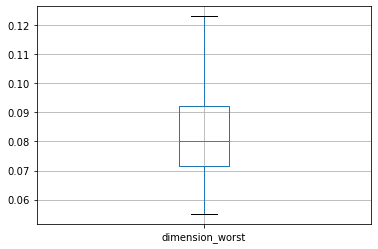

In [75]:
df.boxplot(column=["dimension_worst"])
plt.show()

In [76]:
df.drop(['id'],axis=1,inplace=True)

### logistic regression

In [77]:
x=df.drop(['diagnosis_M'],axis=1)
y=df[['diagnosis_B']]

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.3,test_size=0.2,random_state=1)

In [79]:
reg=LogisticRegression()
reg.fit(x_train,y_train)

C:\Users\phili\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\phili\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
reg.score(x_train,y_train)

0.9941176470588236

In [81]:
reg.score(x_test,y_test)

1.0

In [82]:
# firt Creating model with all the features
x = df.drop(['diagnosis_M'],axis=1)
y= df['diagnosis_B']
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state=1)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred= model.predict(x_test)

In [83]:
# Creating Function for viewing Result of the predicted
def res(y_valid):
    cm1 = confusion_matrix(y_test,y_valid)
    ConfusionMatrixDisplay(cm1).plot().ax_.set(ylabel = 'Actual value', xlabel ='Predicted value')
    print('Accuracy',accuracy_score(y_test,y_valid))
    print(classification_report(y_test,y_valid))
    plt.show()

Accuracy 0.9912280701754386
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.99      1.00      0.99        77

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



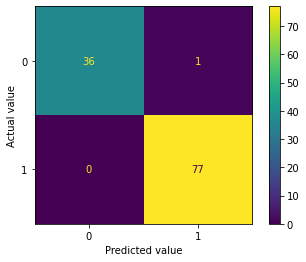

In [84]:
res(y_pred)

### scale the data

In [121]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore

In [122]:
xscaled=x.apply(zscore) # convert all attributes
xscaled.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst,diagnosis_B
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,2.552147e-16,3.272134e-16,-3.871147e-16,7.882779e-17,1.191587e-15,4.877957e-18,1.022420e-16,7.024258e-18,-3.707247e-17,1.910988e-15,2.489709e-16,-2.313127e-16,-7.692538e-17,2.946286e-17,2.665316e-16,-6.541340e-17,-3.795051e-17,1.439973e-16,-5.808671e-16,9.990056e-17,-7.301326e-16,-3.861391e-16,-1.717041e-17,-1.229245e-16,3.344327e-16,5.229170e-17,-7.199865e-17,2.224348e-16,-2.722876e-16,-1.351194e-17,-5.073075e-18
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.122184e+00,-2.281340e+00,-2.073821e+00,-1.626699e+00,-2.800558e+00,-1.699191e+00,-1.177440e+00,-1.291295e+00,-2.669855e+00,-1.971880e+00,-1.342941e+00,-1.727281e+00,-1.385466e+00,-1.160026e+00,-2.144171e+00,-1.493850e+00,-1.461044e+00,-2.116403e+00,-1.852580e+00,-1.515968e+00,-1.800893e+00,-2.252978e+00,-1.763105e+00,-1.398716e+00,-2.677510e+00,-1.559587e+00,-1.362240e+00,-1.745063e+00,-2.436155e+00,-1.771202e+00,-1.297676e+00
25%,-7.080771e-01,-7.372998e-01,-7.110704e-01,-7.193810e-01,-7.237785e-01,-7.762471e-01,-7.770901e-01,-7.511308e-01,-7.231654e-01,-7.648199e-01,-7.486422e-01,-7.507268e-01,-7.797939e-01,-7.048727e-01,-7.088254e-01,-7.687820e-01,-7.270727e-01,-7.230329e-01,-7.442244e-01,-7.551890e-01,-6.925011e-01,-7.552307e-01,-7.076603e-01,-7.041009e-01,-6.999628e-01,-7.194426e-01,-7.818702e-01,-7.563999e-01,-6.914798e-01,-7.436156e-01,-1.297676e+00
50%,-2.076408e-01,-9.912842e-02,-2.303295e-01,-2.906340e-01,-2.895864e-02,-2.146581e-01,-3.439642e-01,-4.003299e-01,-5.891024e-02,-1.659685e-01,-2.973876e-01,-1.856572e-01,-2.939721e-01,-4.296716e-01,-2.058731e-01,-2.752695e-01,-2.017650e-01,-1.224864e-01,-2.005545e-01,-2.272763e-01,-2.648538e-01,-3.941976e-02,-2.832903e-01,-3.438521e-01,-4.078051e-02,-2.661248e-01,-2.131581e-01,-2.234689e-01,-1.006315e-01,-2.066671e-01,7.706085e-01
75%,5.145457e-01,6.083575e-01,5.452832e-01,4.685234e-01,6.607414e-01,5.508135e-01,5.927146e-01,6.768071e-01,5.746279e-01,5.482866e-01,4.630598e-01,5.688684e-01,4.693601e-01,4.214744e-01,5.275817e-01,5.282787e-01,5.842510e-01,5.670840e-01,5.228157e-01,5.435099e-01,5.686221e-01,6.730849e-01,5.854938e-01,4.925901e-01,6.184018e-01,6.250965e-01,5.785783e-01,7.125100e-01,5.626793e-01,5.468131e-01,7.706085e-01
max,2.348480e+00,2.626843e+00,2.429814e+00,2.250380e+00,2.737521e+00,2.541404e+00,2.647422e+00,2.818714e+00,2.521318e+00,2.517947e+00,2.280613e+00,2.548261e+00,2.343091e+00,2.110995e+00,2.382192e+00,2.473870e+00,2.551236e+00,2.502259e+00,2.423376e+00,2.491558e+00,2.460307e+00,2.815558e+00,2.525225e+00,2.287627e+00,2.595949e+00,2.641905e+00,2.619251e+00,2.685877e+00,2.443918e+00,2.482456e+00,7.706085e-01


In [123]:
x_train , x_test, y_train,y_test=train_test_split(xscaled,y,test_size=0.30,random_state=1)

## build KNN model

In [196]:
NNH =KNeighborsClassifier(n_neighbors=24)
NNH.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=24)

## evaluate performance of KNN model

In [197]:
predicted_label=NNH.predict(x_test)
NNH.score(x_train,y_train)

0.9899497487437185

In [198]:
NNH.score(x_test,y_test)

0.9824561403508771